In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 15.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import os
import json
import numpy as np
from shutil import copyfile
import pandas as pd
from dataclasses import dataclass, field
import yaml
from ultralytics import YOLO
import requests
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# def download_and_unzip(url, save_path):

#     print("Downloading and extracting assets...", end="")
#     file = requests.get(url)
#     open(save_path, "wb").write(file.content)

#     try:
#         # Extract tarfile.
#         if save_path.endswith(".tar"):
#             with tarfile.open(save_path, "r") as tar:
#                 tar.extractall(os.path.split(save_path)[0])

#         print("Done")
#     except:
#         print("Invalid file")

In [ ]:
# IMAGES_URL = r"http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
IMAGES_DIR = "/content/drive/MyDrive/APE/proj1(orignal)/Images"
IMAGES_TAR_PATH = os.path.join(os.getcwd(), f"{IMAGES_DIR}.tar")

ANNS_METADATA_URL = r"https://github.com/benjiebob/StanfordExtra/raw/master/keypoint_definitions.csv"
ANNS_METADATA = "/content/drive/MyDrive/APE/proj1(orignal)/keypoint_definitions.csv"

# # Download if dataset does not exists.
# if not os.path.exists(IMAGES_DIR):
#     # download_and_unzip(IMAGES_URL, IMAGES_TAR_PATH)
#     os.remove(IMAGES_TAR_PATH)
#     pass

# if not os.path.isfile(ANNS_METADATA):
    # download_and_unzip(ANNS_METADATA_URL, ANNS_METADATA)

In [ ]:
ANN_PATH = "/content/drive/MyDrive/APE/proj1(orignal)/StanfordExtra_V12"
# ANN_PATH = "/content/drive/MyDrive/APE/proj1/check111.json"
JSON_PATH = os.path.join(ANN_PATH, "StanfordExtra_v12.json")

with open(JSON_PATH) as file:
    json_data = json.load(file)

In [ ]:
train_ids = np.load(os.path.join(ANN_PATH,
                                 "train_stanford_StanfordExtra_v12.npy"))
val_ids = np.load(os.path.join(ANN_PATH,
                               "test_stanford_StanfordExtra_v12.npy"))

In [ ]:
DATA_DIR = "/content/drive/MyDrive/APE/proj1(orignal)/animal-pose-data"

TRAIN_DIR         = f"train"
TRAIN_FOLDER_IMG    = f"images"
TRAIN_FOLDER_LABELS = f"labels"

TRAIN_IMG_PATH   = os.path.join(DATA_DIR, TRAIN_DIR, TRAIN_FOLDER_IMG)
TRAIN_LABEL_PATH = os.path.join(DATA_DIR, TRAIN_DIR, TRAIN_FOLDER_LABELS)

VALID_DIR           = f"valid"
VALID_FOLDER_IMG    = f"images"
VALID_FOLDER_LABELS = f"labels"

VALID_IMG_PATH   = os.path.join(DATA_DIR, VALID_DIR, VALID_FOLDER_IMG)
VALID_LABEL_PATH = os.path.join(DATA_DIR, VALID_DIR, VALID_FOLDER_LABELS)

# os.makedirs(TRAIN_IMG_PATH, exist_ok=True)
# os.makedirs(TRAIN_LABEL_PATH, exist_ok=True)
# os.makedirs(VALID_IMG_PATH, exist_ok=True)
# os.makedirs(VALID_LABEL_PATH, exist_ok=True)

In [ ]:
train_json_data = []
for train_id in train_ids:
    train_json_data.append(json_data[train_id])

val_json_data = []
for val_id in val_ids:
    val_json_data.append(json_data[val_id])

In [ ]:
train_json_data

[{'img_path': 'n02085620-Chihuahua/n02085620_10074.jpg',
  'img_width': 333,
  'img_height': 500,
  'img_bbox': [25, 10, 251, 488],
  'is_multiple_dogs': False,
  'joints': [[231.5, 482.5, 1],
   [220.0, 412.0, 1],
   [222.5, 338.5, 1],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [95.0, 487.0, 1],
   [123.5, 430.5, 1],
   [76.0, 339.0, 1],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [204.66666666666666, 60.333333333333336, 1],
   [98.5, 59.5, 1],
   [164.66666666666666, 200.0, 1],
   [0, 0, 0],
   [265.9951923076923, 23.389423076923077, 1],
   [37.86178861788618, 34.09756097560975, 1],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0]],
  'seg': 'lV=3^?6L3KEl@=R?3O<D4L4L3N2M3N:E5L9G;D2O2N3SG^Oc2e0kLWMiLb2Q68TMWMiLg2o54UMWMjLi2o5OWMYMfLn2P6JXMb0e2^OYMf0d2[O[Mh0b2XOeL[MRNb3U5ROfLbMPN_3Y5oNdLo1[3SN`LQ2`3PN[LU2c3nMWLY2f3iMnJiMLh4o4aMkJPN1e4R5e4O2M3N1N2N3N2M3N1N1O2O5J2O1N0010O03M2O2M2O1N1gN]D_Ne;^1_D`Nd;\\1\\DdNi;V1XDkNk;n0XDROl;g0WDYOj;c0YD^Oh;=[DCf;9]DHf

In [ ]:
# for data in train_json_data:
#     img_file = data["img_path"]
#     filename = img_file.split("/")[-1]
#     # copyfile(os.path.join(IMAGES_DIR, img_file),
#     #          os.path.join(TRAIN_IMG_PATH, filename))


# for data in val_json_data:
#     img_file = data["img_path"]
#     filename = img_file.split("/")[-1]
#     # copyfile(os.path.join(IMAGES_DIR, img_file),
#     #          os.path.join(VALID_IMG_PATH, filename))

In [ ]:
CLASS_ID = 0

In [ ]:
def create_yolo_boxes_kpts(img_size, boxes, lm_kpts):

    IMG_W, IMG_H = img_size
    # Modify kpts with visibilities as 1s to 2s.
    vis_ones = np.where(lm_kpts[:, -1] == 1.)
    lm_kpts[vis_ones, -1] = 2.

    # Normalizing factor for bboxes and kpts.
    res_box_array = np.array([IMG_W, IMG_H, IMG_W, IMG_H])
    res_lm_array = np.array([IMG_W, IMG_H])

    # Normalize landmarks in the range [0,1].
    norm_kps_per_img = lm_kpts.copy()
    norm_kps_per_img[:, :-1]  = norm_kps_per_img[:, :-1] / res_lm_array

    # Normalize bboxes in the range [0,1].
    norm_bbox_per_img = boxes / res_box_array

    # Create bboxes coordinates to YOLO.
    # x_c, y_c = x_min + bbox_w/2. , y_min + bbox_h/2.
    yolo_boxes = norm_bbox_per_img.copy()
    yolo_boxes[:2] = norm_bbox_per_img[:2] + norm_bbox_per_img[2:]/2.

    return yolo_boxes, norm_kps_per_img

In [ ]:
# def create_yolo_txt_files(json_data, LABEL_PATH):

#     for data in json_data:

#         IMAGE_ID = data["img_path"].split("/")[-1].split(".")[0]

#         IMG_WIDTH, IMG_HEIGHT = data["img_width"], data["img_height"]

#         landmark_kpts  = np.nan_to_num(np.array(data["joints"], dtype=np.float32))
#         landmarks_bboxes = np.array(data["img_bbox"], dtype=np.float32)

#         bboxes_yolo, kpts_yolo = create_yolo_boxes_kpts(
#                                             (IMG_WIDTH, IMG_HEIGHT),
#                                             landmarks_bboxes,
#                                             landmark_kpts)

#         TXT_FILE = IMAGE_ID+".txt"

#         with open(os.path.join(LABEL_PATH, TXT_FILE), "w") as f:

#             x_c_norm, y_c_norm, box_width_norm, box_height_norm = round(bboxes_yolo[0],5),\
#                                                                   round(bboxes_yolo[1],5),\
#                                                                   round(bboxes_yolo[2],5),\
#                                                                   round(bboxes_yolo[3],5),\

#             kps_flattend = [round(ele,5) for ele in kpts_yolo.flatten().tolist()]
#             line = f"{CLASS_ID} {x_c_norm} {y_c_norm} {box_width_norm} {box_height_norm} "
#             line+= " ".join(map(str, kps_flattend))
#             f.write(line)

def create_yolo_txt_files(json_data, LABEL_PATH):

    for data in json_data:

        IMAGE_ID = data["img_path"].split("/")[-1].split(".")[0]

        IMG_WIDTH, IMG_HEIGHT = data["img_width"], data["img_height"]

        landmark_kpts  = np.nan_to_num(np.array(data["joints"], dtype=np.float32))
        landmarks_bboxes = np.array(data["img_bbox"], dtype=np.float32)

        bboxes_yolo, kpts_yolo = create_yolo_boxes_kpts(
                                            (IMG_WIDTH, IMG_HEIGHT),
                                            landmarks_bboxes,
                                            landmark_kpts)

        TXT_FILE = IMAGE_ID+".txt"

        try:
            with open(os.path.join(LABEL_PATH, TXT_FILE), "w") as f:
                x_c_norm, y_c_norm, box_width_norm, box_height_norm = round(bboxes_yolo[0],5),\
                                                                      round(bboxes_yolo[1],5),\
                                                                      round(bboxes_yolo[2],5),\
                                                                      round(bboxes_yolo[3],5),\

                kps_flattend = [round(ele,5) for ele in kpts_yolo.flatten().tolist()]
                line = f"{CLASS_ID} {x_c_norm} {y_c_norm} {box_width_norm} {box_height_norm} "
                line+= " ".join(map(str, kps_flattend))
                f.write(line)
        except OSError as e:
            print(f"An error occurred while creating the file {TXT_FILE}: {e}")


In [ ]:
TRAIN_LABEL_PATH

'/content/drive/MyDrive/APE/proj1(orignal)/animal-pose-data/train/labels'

In [ ]:
# create_yolo_txt_files(train_json_data, TRAIN_LABEL_PATH)
# create_yolo_txt_files(val_json_data, VALID_LABEL_PATH)

In [ ]:
# # with open('/content/drive/MyDrive/APE/proj1/animal-pose-data/train/labels/n02107142_18582.txt', "w") as f:
#   # print(f.read())

# f = open('/content/drive/MyDrive/APE/proj1/animal-pose-data/train/labels/n02107142_18582.txt', "r")
# print(f.read())

In [ ]:
ann_meta_data = pd.read_csv("/content/drive/MyDrive/APE/proj1(orignal)/keypoint_definitions.csv")
COLORS = ann_meta_data["Hex colour"].values.tolist()

COLORS_RGB_MAP = []
for color in COLORS:
    R, G, B = int(color[:2], 16), int(color[2:4], 16), int(color[4:], 16)
    COLORS_RGB_MAP.append({color: (R,G,B)})

In [ ]:
def draw_landmarks(image, landmarks):

    radius = 5
    # Check if image width is greater than 1000 px.
    # To improve visualization.
    if (image.shape[1] > 1000):
        radius = 8

    for idx, kpt_data in enumerate(landmarks):

        loc_x, loc_y = kpt_data[:2].astype("int").tolist()
        color_id = list(COLORS_RGB_MAP[int(kpt_data[-1])].values())[0]

        cv2.circle(image,
                   (loc_x, loc_y),
                   radius,
                   color=color_id[::-1],
                   thickness=-1,
                   lineType=cv2.LINE_AA)

    return image

In [ ]:
def draw_boxes(image, detections, class_name = "dog", score=None, color=(0,255,0)):

    font_size = 0.25 + 0.07 * min(image.shape[:2]) / 100
    font_size = max(font_size, 0.5)
    font_size = min(font_size, 0.8)
    text_offset = 3

    thickness = 2
    # Check if image width is greater than 1000 px.
    # To improve visualization.
    if (image.shape[1] > 1000):
        thickness = 10

    xmin, ymin, xmax, ymax = detections[:4].astype("int").tolist()
    conf = round(float(detections[-1]),2)
    cv2.rectangle(image,
                  (xmin, ymin),
                  (xmax, ymax),
                  color=(0,255,0),
                  thickness=thickness,
                  lineType=cv2.LINE_AA)

    display_text = f"{class_name}"

    if score is not None:
        display_text+=f": {score:.2f}"

    (text_width, text_height), _ = cv2.getTextSize(display_text,
                                                   cv2.FONT_HERSHEY_SIMPLEX,
                                                   font_size, 2)

    cv2.rectangle(image,
                      (xmin, ymin),
                      (xmin + text_width + text_offset, ymin - text_height - int(15 * font_size)),
                      color=color, thickness=-1)

    image = cv2.putText(
                    image,
                    display_text,
                    (xmin + text_offset, ymin - int(10 * font_size)),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    font_size,
                    (0, 0, 0),
                    2, lineType=cv2.LINE_AA,
                )

    return image

In [ ]:
def visualize_annotations(image, box_data, keypoints_data):

    image = image.copy()

    shape_multiplier = np.array(image.shape[:2][::-1]) # (W, H).
    # Final absolute coordinates (xmin, ymin, xmax, ymax).
    denorm_boxes = np.zeros_like(box_data)

    # De-normalize center coordinates from YOLO to (xmin, ymin).
    denorm_boxes[:, :2] = (shape_multiplier/2.) * (2*box_data[:,:2] - box_data[:,2:])

    # De-normalize width and height from YOLO to (xmax, ymax).
    denorm_boxes[:, 2:] = denorm_boxes[:,:2] + box_data[:,2:]*shape_multiplier

    for boxes, kpts in zip(denorm_boxes, keypoints_data):
        # De-normalize landmark coordinates.
        kpts[:, :2]*= shape_multiplier
        image = draw_boxes(image, boxes)
        image = draw_landmarks(image, kpts)

    return image

In [ ]:
@dataclass(frozen=True)
class TrainingConfig:
    DATASET_YAML:   str = "animal-keypoints.yaml"
    MODEL:          str = "yolov8m-pose.pt"
    EPOCHS:         int = 100
    KPT_SHAPE:    tuple = (24,3)
    PROJECT:        str = "Animal_Keypoints"
    NAME:           str = f"{MODEL.split('.')[0]}_{EPOCHS}_epochs"
    CLASSES_DICT:  dict = field(default_factory = lambda:{0 : "dog"})

In [ ]:
@dataclass(frozen=True)
class DatasetConfig:
    IMAGE_SIZE:    int   = 640
    BATCH_SIZE:    int   = 16
    CLOSE_MOSAIC:  int   = 10
    MOSAIC:        float = 0.4
    FLIP_LR:       float = 0.0 # Turn off horizontal flip.

In [ ]:
train_config = TrainingConfig()
data_config = DatasetConfig()

In [ ]:
# current_dir = os.getcwd()
# current_dir

In [ ]:
# list(train_config.KPT_SHAPE)

In [ ]:
# current_dir

In [ ]:
current_dir = os.getcwd()

data_dict = dict(
                path      = os.path.join(current_dir, DATA_DIR),
                train     = os.path.join(TRAIN_DIR, TRAIN_FOLDER_IMG),
                val       = os.path.join(VALID_DIR, VALID_FOLDER_IMG),
                names     = train_config.CLASSES_DICT,
                kpt_shape = list(train_config.KPT_SHAPE),
               )

with open(train_config.DATASET_YAML, "w") as config_file:
    yaml.dump(data_dict, config_file)


In [ ]:
train_config

TrainingConfig(DATASET_YAML='animal-keypoints.yaml', MODEL='yolov8m-pose.pt', EPOCHS=100, KPT_SHAPE=(24, 3), PROJECT='Animal_Keypoints', NAME='yolov8m-pose_100_epochs', CLASSES_DICT={0: 'dog'})

In [ ]:
data_config

DatasetConfig(IMAGE_SIZE=640, BATCH_SIZE=16, CLOSE_MOSAIC=10, MOSAIC=0.4, FLIP_LR=0.0)

In [ ]:
pose_model = model = YOLO(train_config.MODEL)

pose_model.train(
            data    = train_config.DATASET_YAML,
            epochs       = train_config.EPOCHS,
            imgsz        = data_config.IMAGE_SIZE,
            batch        = data_config.BATCH_SIZE,
            project      = train_config.PROJECT,
            name         = train_config.NAME,
            close_mosaic = data_config.CLOSE_MOSAIC,
            mosaic       = data_config.MOSAIC,
            fliplr       = data_config.FLIP_LR
           )

100%|██████████| 50.8M/50.8M [00:00<00:00, 298MB/s]


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8m-pose.pt, data=animal-keypoints.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Animal_Keypoints, name=yolov8m-pose_100_epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 79.4MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[24, 3]

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1 

100%|██████████| 6.25M/6.25M [00:00<00:00, 347MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/APE/proj1(orignal)/animal-pose-data/train/labels.cache... 6773 images, 0 backgrounds, 2 corrupt: 100%|██████████| 6773/6773 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/APE/proj1(orignal)/animal-pose-data/train/images/n02085782_2914.jpg: ignoring corrupt image/label: labels require 77 columns each
train: WARNING ⚠️ /content/drive/MyDrive/APE/proj1(orignal)/animal-pose-data/train/images/n02085782_2922.jpg: ignoring corrupt image/label: labels require 77 columns each


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/APE/proj1(orignal)/animal-pose-data/valid/labels.cache... 1703 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1703/1703 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/APE/proj1(orignal)/animal-pose-data/valid/images/n02085782_2886.jpg: ignoring corrupt image/label: labels require 77 columns each


Plotting labels to Animal_Keypoints/yolov8m-pose_100_epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 83 weight(decay=0.0), 93 weight(decay=0.0005), 92 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Animal_Keypoints/yolov8m-pose_100_epochs
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.55G     0.7428      10.01     0.6856      0.701      1.322          4        640: 100%|██████████| 424/424 [12:09<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.19it/s]

                   all       1702       1702      0.938      0.957      0.978      0.832     0.0148     0.0153    0.00302   0.000433



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.35G     0.7221      7.997     0.5963     0.5681      1.286          5        640: 100%|██████████| 424/424 [03:55<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702      0.914      0.958      0.962      0.739     0.0945     0.0993     0.0184    0.00285



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.44G     0.8567      7.536     0.5582     0.6808      1.392          8        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.30it/s]

                   all       1702       1702      0.885       0.91      0.938      0.675      0.162      0.142     0.0385    0.00573



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.46G     0.9829      7.401     0.5414     0.7897      1.488          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.30it/s]

                   all       1702       1702      0.807      0.811      0.864      0.551      0.212      0.166     0.0841     0.0135



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.46G     0.9493      6.947     0.5251     0.7508      1.455          3        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.31it/s]

                   all       1702       1702      0.919      0.915      0.961      0.719      0.383       0.33      0.179     0.0298



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.48G     0.9095      6.611     0.5156     0.7225      1.401          8        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.31it/s]

                   all       1702       1702      0.935      0.932      0.968      0.769      0.479      0.417       0.29      0.056



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.46G     0.8692      6.313     0.5071     0.6817      1.383          3        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702      0.932      0.957      0.974      0.786      0.544      0.504      0.368     0.0738



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.46G     0.8357      6.127     0.4999     0.6579      1.356          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.941      0.941      0.975      0.783      0.564      0.515       0.39     0.0852



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.46G     0.8152      5.906     0.4944     0.6354      1.329          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702       0.93      0.949      0.971      0.783        0.6      0.553      0.448      0.103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.47G     0.7848      5.734     0.4878     0.5988      1.307          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.948      0.958      0.981      0.813      0.647      0.579      0.509      0.124



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.46G     0.7648      5.624      0.481      0.596      1.285          6        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.947      0.952       0.98      0.804      0.692      0.639      0.565      0.149



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.48G     0.7503      5.466     0.4739     0.5604      1.277          8        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702      0.935      0.961      0.974      0.813      0.708      0.652      0.582      0.149



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.43G     0.7346      5.375     0.4714     0.5494      1.259          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.937      0.965      0.978      0.816      0.693      0.665      0.586      0.152



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.46G     0.7298      5.264     0.4606     0.5483      1.254          5        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.946      0.965      0.977      0.825      0.715      0.706      0.611      0.168



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.46G     0.7069      5.197     0.4567     0.5378       1.24          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.942      0.946      0.978      0.809      0.687      0.647      0.585      0.156



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.48G     0.6972      5.087     0.4508     0.5223      1.226          6        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.958      0.955      0.984       0.84       0.77      0.736      0.699      0.211



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.47G      0.689      5.074     0.4478     0.5202      1.224          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702       0.95      0.977      0.985      0.855      0.774      0.741      0.696      0.209



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.45G     0.6835      4.905     0.4426     0.5133      1.213          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.35it/s]

                   all       1702       1702      0.952      0.967      0.986      0.849       0.78      0.736      0.694       0.21



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.46G     0.6744      4.896     0.4383     0.4979       1.21          7        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702      0.949      0.969      0.986      0.862      0.787      0.774      0.749      0.239



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.47G     0.6618      4.814     0.4375     0.4868      1.199          6        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702       0.95      0.975      0.987      0.858      0.785      0.758      0.708      0.229



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.46G     0.6516      4.781     0.4365      0.481      1.193          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.951      0.975      0.987      0.857        0.8      0.773      0.743      0.251



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.46G     0.6398      4.678     0.4293     0.4725      1.181          6        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.957      0.976      0.989      0.864      0.814      0.795      0.764      0.262



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.46G     0.6343      4.654     0.4294     0.4669      1.176          7        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.959      0.968      0.988      0.871      0.817      0.796      0.746      0.257



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.47G     0.6329      4.607     0.4254     0.4633      1.176          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.949      0.979      0.987      0.865      0.826        0.8      0.769      0.265



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.47G     0.6251      4.519      0.421     0.4581      1.169          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702       0.96      0.978      0.989      0.873      0.824      0.807      0.796      0.284



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.47G     0.6209      4.567     0.4191     0.4586      1.168          3        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.951      0.976      0.989      0.872      0.823      0.801      0.779      0.275



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.46G     0.6044      4.407     0.4152     0.4432      1.147          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702       0.95      0.986       0.99       0.88      0.836      0.829      0.801       0.29



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.47G     0.6065      4.399      0.415     0.4467      1.158          7        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702      0.955      0.977      0.988      0.879      0.852      0.825      0.816      0.303



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.47G     0.6027      4.378     0.4139     0.4429       1.15          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.959      0.973       0.99      0.885      0.846      0.829      0.812        0.3



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.45G     0.5961      4.308     0.4102     0.4307      1.142          3        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.957       0.98       0.99      0.883       0.83      0.831      0.795      0.296



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.46G     0.5857       4.27     0.4082     0.4306      1.135          8        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.963      0.975      0.989      0.883      0.857      0.847      0.838      0.322



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.47G     0.5767      4.221     0.4085     0.4221      1.128          3        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.963       0.97      0.989      0.887      0.853      0.834      0.825       0.32



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.47G     0.5712      4.196     0.4068     0.4161       1.12          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702       0.96      0.977       0.99      0.887      0.865      0.847      0.848       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.46G     0.5737       4.13     0.4059     0.4175       1.13          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.963      0.981       0.99      0.887      0.866      0.855      0.841      0.335



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.45G     0.5741      4.101     0.4032     0.4189      1.122          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]

                   all       1702       1702      0.966      0.978      0.992      0.891      0.877      0.858      0.845      0.338



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.46G     0.5718      4.086     0.3999     0.4208      1.129          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]

                   all       1702       1702      0.962      0.973       0.99      0.892      0.892      0.856      0.866      0.353



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.46G     0.5687      4.087     0.3993     0.4151      1.124          3        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.957      0.978      0.989      0.894      0.869      0.851      0.848      0.349



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.46G     0.5564      4.028     0.4008      0.402      1.115          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.956      0.979      0.991      0.891      0.876      0.856      0.855      0.351



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.46G       0.55      3.946     0.3952     0.4008      1.111          6        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.962      0.962       0.99      0.891      0.877      0.862      0.866      0.365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.46G     0.5448      3.979     0.3991      0.398      1.099          5        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.964      0.975       0.99      0.895      0.876       0.87       0.86       0.36



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.46G     0.5554      3.956     0.3948     0.4034      1.114          7        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.951      0.983       0.99      0.893      0.881      0.862      0.859      0.365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.47G     0.5407      3.875     0.3954     0.3879      1.101          9        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.31it/s]

                   all       1702       1702      0.974      0.968      0.991        0.9      0.886      0.877      0.868      0.375



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.45G     0.5415      3.859     0.3941     0.3926        1.1          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.23it/s]

                   all       1702       1702      0.967      0.976      0.992      0.899      0.892      0.888      0.884      0.382



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.45G     0.5356      3.858     0.3917     0.3913      1.097          8        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.21it/s]

                   all       1702       1702      0.962      0.977      0.991      0.897      0.892      0.874      0.882      0.389



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.45G     0.5336      3.824     0.3899      0.385      1.095          6        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.20it/s]

                   all       1702       1702      0.963       0.98      0.992      0.903      0.888      0.888      0.889       0.39



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.44G     0.5288      3.735     0.3895     0.3762      1.088          3        640: 100%|██████████| 424/424 [03:55<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.23it/s]

                   all       1702       1702      0.971      0.969      0.991      0.901      0.891      0.891      0.887       0.39



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.47G     0.5212      3.722     0.3872     0.3735      1.087          4        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.24it/s]

                   all       1702       1702      0.965       0.98      0.992      0.907      0.905      0.882      0.891      0.401



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.45G     0.5214      3.747      0.385     0.3766      1.084          3        640: 100%|██████████| 424/424 [03:54<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]

                   all       1702       1702      0.966      0.973      0.991      0.904      0.893       0.89      0.886      0.398



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.45G     0.5228      3.701     0.3857     0.3741      1.085          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.31it/s]

                   all       1702       1702      0.962      0.978      0.991      0.907        0.9      0.882       0.89      0.406



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.42G     0.5155      3.677     0.3832     0.3675      1.085          5        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.963      0.981      0.991      0.904       0.89       0.89      0.883      0.396



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.45G     0.5058      3.616     0.3851     0.3585      1.071          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.964      0.981      0.992      0.908        0.9      0.892      0.894      0.407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.46G     0.5149      3.601     0.3824      0.365       1.08          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]

                   all       1702       1702      0.973      0.975      0.991       0.91      0.912      0.893      0.919      0.429



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.47G     0.5045      3.578     0.3814     0.3584      1.072          6        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.959      0.983      0.992       0.91        0.9      0.894      0.903      0.419



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.46G     0.5056      3.578     0.3821     0.3599       1.07          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.964      0.977       0.99      0.913      0.907      0.891      0.908      0.424



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.47G     0.5015      3.505     0.3787     0.3603      1.071          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.962      0.984      0.992       0.91      0.908      0.891        0.9      0.426



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.45G     0.4938      3.467     0.3782     0.3577      1.065          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.968      0.975      0.991      0.911      0.919      0.893      0.911      0.437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.46G     0.4932      3.448     0.3794     0.3484      1.063          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.956      0.984      0.992      0.915      0.916      0.895      0.911      0.428



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.47G     0.4919      3.442      0.377     0.3471      1.064          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.967      0.978      0.991      0.915      0.905      0.899      0.902       0.44



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.47G     0.4841      3.443     0.3751     0.3488      1.056          6        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702       0.97      0.972      0.992      0.916      0.923      0.892       0.91      0.437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.46G     0.4828      3.379     0.3779      0.344      1.054          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.966      0.977       0.99      0.914      0.915      0.903      0.915      0.446



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.47G     0.4855      3.398     0.3782     0.3385      1.058          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]

                   all       1702       1702      0.962      0.982      0.991      0.914      0.915      0.904      0.911      0.438



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.46G     0.4836      3.349     0.3741     0.3388      1.057          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.962      0.982      0.991      0.916      0.905      0.907      0.911      0.441



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.46G     0.4738      3.301     0.3737     0.3381      1.048          4        640: 100%|██████████| 424/424 [03:53<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.965      0.975      0.991      0.912      0.914      0.889      0.903      0.444



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.47G      0.474      3.312     0.3718     0.3409       1.05          9        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.35it/s]

                   all       1702       1702      0.964       0.98      0.991      0.913      0.908      0.916      0.913      0.442



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.46G     0.4658      3.261     0.3736     0.3335      1.042          5        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.962      0.979      0.992      0.918      0.902      0.911      0.915      0.452



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.45G     0.4659      3.257     0.3719     0.3306      1.045          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.962      0.984      0.991      0.919      0.907       0.91       0.92      0.461



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.45G     0.4656      3.215     0.3701     0.3258      1.044          3        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]

                   all       1702       1702      0.969      0.978      0.992      0.916      0.915      0.911      0.917      0.452



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.46G     0.4623      3.155     0.3698      0.323      1.039          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.961      0.981       0.99      0.918      0.911      0.912       0.92      0.452



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.46G      0.458      3.154     0.3685     0.3194      1.036          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.968      0.978      0.992      0.917      0.905      0.915      0.916      0.451



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.47G      0.452      3.112     0.3683     0.3201       1.03          9        640: 100%|██████████| 424/424 [03:52<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.964      0.983      0.991      0.918      0.921      0.911      0.922       0.46



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.46G     0.4524        3.1     0.3685      0.325      1.033          9        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.965       0.98      0.992      0.918      0.917      0.919       0.93      0.465



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.45G     0.4584      3.062     0.3674      0.324       1.04          6        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.965      0.979      0.991      0.917      0.924      0.912      0.928      0.471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.46G     0.4483      3.041     0.3655     0.3137      1.029          6        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.964      0.983      0.991      0.918       0.92      0.921      0.926      0.468



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.46G     0.4478      3.081     0.3654     0.3163       1.03          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.967       0.98      0.991      0.917       0.91      0.923      0.922      0.467



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.46G     0.4476      3.052     0.3627     0.3145      1.032          7        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.963      0.981      0.991      0.919      0.908      0.918      0.918      0.472



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.45G      0.437      2.978     0.3627      0.308      1.024          6        640: 100%|██████████| 424/424 [03:53<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.964      0.981      0.991       0.92      0.927      0.904      0.924      0.469



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.47G     0.4358      2.963      0.364     0.3058       1.02          7        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.972      0.971      0.991      0.916      0.911      0.917      0.922      0.468



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.46G     0.4339       2.93     0.3611     0.3094      1.018          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.964       0.98      0.992      0.916      0.913      0.913       0.92      0.469



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.46G     0.4356      2.916     0.3619     0.3006      1.026          3        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.38it/s]

                   all       1702       1702      0.968      0.977      0.991      0.917      0.913      0.923      0.922      0.468



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.47G     0.4289      2.902      0.359     0.3002      1.021          8        640: 100%|██████████| 424/424 [03:52<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]

                   all       1702       1702      0.964      0.981      0.991      0.918      0.912      0.917      0.918       0.47



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.47G     0.4244      2.874     0.3615     0.3003      1.012          7        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.956      0.983      0.991      0.917      0.911      0.922      0.922      0.475



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.46G     0.4315      2.881       0.36     0.3045       1.02          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.38it/s]

                   all       1702       1702      0.964      0.981      0.991      0.918      0.911      0.921      0.926      0.475



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.46G     0.4234      2.872     0.3596     0.2973       1.01          5        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.38it/s]

                   all       1702       1702       0.97      0.979      0.991      0.919      0.926      0.904      0.924      0.485



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.46G     0.4238      2.785     0.3568     0.2949      1.015          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.38it/s]

                   all       1702       1702      0.963      0.982      0.991      0.919      0.909      0.915      0.921      0.486



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.45G     0.4143      2.794     0.3581     0.2873      1.005          3        640: 100%|██████████| 424/424 [03:52<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.38it/s]

                   all       1702       1702      0.966      0.979      0.992      0.919      0.914       0.92      0.924      0.481



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.47G     0.4194      2.771      0.355     0.2921      1.015          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.961      0.984      0.991      0.922      0.912      0.921      0.926      0.482



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.46G     0.4208      2.758     0.3561     0.2902      1.013          4        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.38it/s]

                   all       1702       1702       0.97      0.974      0.991      0.922      0.915      0.918      0.929      0.486



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.46G       0.41      2.732     0.3565     0.2857      1.005          6        640: 100%|██████████| 424/424 [03:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.972      0.973      0.991      0.921      0.916      0.919      0.927      0.484



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.47G     0.4148        2.7     0.3522     0.2904      1.012          7        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]

                   all       1702       1702      0.971      0.974      0.991      0.923      0.921      0.906      0.923      0.486



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.46G     0.4151      2.699     0.3541     0.2872       1.01          7        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.969      0.974      0.991      0.924      0.926      0.904      0.925      0.492


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.47G     0.2625      1.882      0.369     0.1644     0.8976          3        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.28it/s]

                   all       1702       1702      0.966      0.977      0.991      0.923      0.929      0.904      0.925      0.487



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.46G     0.2593      1.837     0.3664     0.1623     0.8944          3        640: 100%|██████████| 424/424 [03:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.27it/s]

                   all       1702       1702      0.963      0.979      0.991      0.923      0.929      0.907      0.929      0.489



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.46G     0.2572      1.823     0.3672     0.1629     0.8966          3        640: 100%|██████████| 424/424 [03:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.29it/s]

                   all       1702       1702      0.964       0.98      0.991      0.924      0.926       0.91      0.925      0.488



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.46G     0.2523      1.799      0.366     0.1578     0.8937          3        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.27it/s]

                   all       1702       1702      0.963      0.981      0.991      0.923      0.925      0.911      0.923      0.487



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.47G     0.2479      1.766     0.3648     0.1548     0.8839          3        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.28it/s]

                   all       1702       1702      0.966       0.98      0.991      0.922      0.922      0.912      0.918      0.485



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.47G     0.2468      1.752     0.3641     0.1552     0.8834          3        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.31it/s]

                   all       1702       1702      0.965      0.981       0.99      0.923      0.927      0.908      0.921      0.484



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.45G     0.2416      1.732     0.3633     0.1511     0.8816          3        640: 100%|██████████| 424/424 [03:51<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.30it/s]

                   all       1702       1702      0.962      0.985       0.99      0.921      0.922      0.915      0.924      0.489



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.46G     0.2412      1.715     0.3628     0.1503     0.8815          3        640: 100%|██████████| 424/424 [03:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1702       1702      0.974       0.97       0.99      0.922      0.927      0.912      0.927       0.49



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.46G     0.2365      1.692     0.3624     0.1473     0.8795          3        640: 100%|██████████| 424/424 [03:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]

                   all       1702       1702      0.968      0.975       0.99      0.922      0.927       0.91      0.926      0.488



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.46G     0.2359      1.685     0.3627     0.1455      0.877          3        640: 100%|██████████| 424/424 [03:51<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1702       1702      0.968      0.975       0.99      0.923      0.922      0.917      0.928      0.491



100 epochs completed in 7.291 hours.
Optimizer stripped from Animal_Keypoints/yolov8m-pose_100_epochs/weights/last.pt, 53.8MB
Optimizer stripped from Animal_Keypoints/yolov8m-pose_100_epochs/weights/best.pt, 53.8MB

Validating Animal_Keypoints/yolov8m-pose_100_epochs/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-pose summary (fused): 237 layers, 26743003 parameters, 0 gradients, 82.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.27it/s]


                   all       1702       1702      0.969      0.974      0.991      0.924      0.926      0.904      0.925      0.492
Speed: 0.2ms preprocess, 8.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to Animal_Keypoints/yolov8m-pose_100_epochs


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d064030eef0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

In [ ]:
pose_model.export(format="tflite")

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8m-pose summary (fused): 237 layers, 26743003 parameters, 0 gradients, 82.2 GFLOPs

PyTorch: starting from 'Animal_Keypoints/yolov8m-pose_100_epochs/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 77, 8400) (51.3 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 297.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 346.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 343.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 105MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.32file/s]


ONNX: starting export with onnx 1.16.1 opset 17...


ONNX: slimming with onnxslim 0.1.31...
ONNX: export success ✅ 3.4s, saved as 'Animal_Keypoints/yolov8m-pose_100_epochs/weights/best.onnx' (102.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 63.1s, saved as 'Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model' (256.2 MB)

TensorFlow Lite: starting export with tensorflow 2.15.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/best_float32.tflite' (102.4 MB)

Export complete (66.9s)
Results saved to /content/Animal_Keypoints/yolov8m-pose_100_epochs/weights
Predict:         yolo predict task=pose model=Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=pose model=Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/best_float32.tflite imgsz=640 data=animal-keypoints.yaml  
Visualize:       https://net

'Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/best_float32.tflite'

In [ ]:
!LC_ALL=C.UTF-8 LANG=C.UTF-8 cp -r /content/runs/pose/train/weights /content/drive/MyDrive/APE/proj1(orignal)/weights


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!cp -r /content/Animal_Keypoints/yolov8m-pose_100_epochs/weights /content/drive/MyDrive/APE/proj1\(orignal\)/new_weights/

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!zip -r /content/drive/MyDrive/APE/proj1\(orignal\)/new_weights/weights.zip /content/Animal_Keypoints/yolov8m-pose_100_epochs/weights


updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/ (stored 0%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/last.pt (deflated 8%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/best.onnx (deflated 17%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/ (stored 0%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/best_float16.tflite (deflated 8%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/fingerprint.pb (stored 0%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/variables/ (stored 0%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/variables/variables.index (deflated 33%)
updating: content/Animal_Keypoints/yolov8m-pose_100_epochs/weights/best_saved_model/variables/variables.data-00000-of-00001 (deflated 80%)
updating: content/Animal_Keypoints/yolov8m

In [ ]:
import locale
import os
import json
import numpy as np
from shutil import copyfile
import pandas as pd
from dataclasses import dataclass, field
import yaml
from ultralytics import YOLO
import requests
import cv2

In [ ]:
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
model = YOLO('/content/drive/MyDrive/APE/proj1/weights/best_V2(02_05_2024).pt')

In [ ]:
# import cv2
# def prepare_predictions(
#     image_dir_path,
#     image_filename,
#     model,
#     BOX_IOU_THRESH = 0.55,
#     BOX_CONF_THRESH=0.30,
#     KPT_CONF_THRESH=0.68):

#     image_path = os.path.join(image_dir_path, image_filename)
#     image = cv2.imread(image_path).copy()

#     results = model.predict(image_path, conf=BOX_CONF_THRESH, iou=BOX_IOU_THRESH)[0].cpu()

#     if not len(results.boxes.xyxy):
#         return image

#     # Get the predicted boxes, conf scores and keypoints.
#     pred_boxes = results.boxes.xyxy.numpy()
#     pred_box_conf = results.boxes.conf.numpy()
#     pred_kpts_xy = results.keypoints.xy.numpy()
#     pred_kpts_conf = results.keypoints.conf.numpy()

#     # Draw predicted bounding boxes, conf scores and keypoints on image.
#     for boxes, score, kpts, confs in zip(pred_boxes, pred_box_conf, pred_kpts_xy, pred_kpts_conf):
#         kpts_ids = np.where(confs > KPT_CONF_THRESH)[0]
#         filter_kpts = kpts[kpts_ids]
#         filter_kpts = np.concatenate([filter_kpts, np.expand_dims(kpts_ids, axis=-1)], axis=-1)
#         image = draw_boxes(image, boxes, score=score)
#         image = draw_landmarks(image, filter_kpts)

#     return image


import cv2
from matplotlib import pyplot as plt

def prepare_predictions(
    image_dir_path,
    image_filename,
    result_path,
    model,
    BOX_IOU_THRESH = 0.55,
    BOX_CONF_THRESH=0.30,
    KPT_CONF_THRESH=0.68):
    # print('model', model)
    image_path = os.path.join(image_dir_path, image_filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model.predict(image_path, conf=BOX_CONF_THRESH, iou=BOX_IOU_THRESH)[0].cpu()

    if not len(results.boxes.xyxy):
        return image

    # Get the predicted boxes, conf scores and keypoints.
    pred_boxes = results.boxes.xyxy.numpy()
    pred_box_conf = results.boxes.conf.numpy()
    pred_kpts_xy = results.keypoints.xy.numpy()
    pred_kpts_conf = results.keypoints.conf.numpy()

    # Draw predicted bounding boxes, conf scores and keypoints on image.
    # Draw predicted bounding boxes, conf scores and keypoints on image.
    for boxes, score, kpts, confs in zip(pred_boxes, pred_box_conf, pred_kpts_xy, pred_kpts_conf):
        kpts_ids = np.where(confs > KPT_CONF_THRESH)[0]
        filter_kpts = kpts[kpts_ids]
        filter_kpts = np.concatenate([filter_kpts, np.expand_dims(kpts_ids, axis=-1)], axis=-1)
        image = draw_boxes(image, boxes, score=score)
        image = draw_landmarks(image, filter_kpts)
    cv2.imwrite(result_path, image)
    plt.imshow(image)
    plt.show()


In [ ]:
# model = YOLO('/content/drive/MyDrive/APE/proj1/weights/best_V2(02_05_2024).pt')
model = YOLO('/content/drive/MyDrive/APE/proj1/weights/best.pt')


image 1/1 /content/drive/MyDrive/APE/proj1/Images/n02085782-Japanese_spaniel/n02085782_2886.jpg: 512x640 1 dog, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


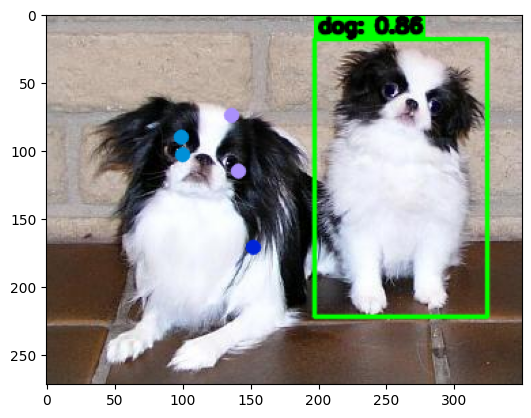

In [ ]:
prepare_predictions('/content/drive/MyDrive/APE/proj1/Images/n02085782-Japanese_spaniel/', 'n02085782_2886.jpg', '/content/drive/MyDrive/APE/proj1/results/modelV1/result1.jpg', model)

# video work

In [ ]:
def prepare_video_predictions(video_path, model, output_path='/content/drive/MyDrive/APE/proj1/results/trim2.avi', BOX_IOU_THRESH=0.55, BOX_CONF_THRESH=0.30, KPT_CONF_THRESH=0.68):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Make predictions
        results = model(frame_rgb, conf=BOX_CONF_THRESH, iou=BOX_IOU_THRESH)[0].cpu()

        if not len(results.boxes.xyxy):
          return frame_rgb

        # Get the predicted boxes, conf scores, and keypoints.
        pred_boxes = results.boxes.xyxy.numpy()
        pred_box_conf = results.boxes.conf.numpy()
        pred_kpts_xy = results.keypoints.xy.numpy()
        pred_kpts_conf = results.keypoints.conf.numpy()




        # Draw predicted bounding boxes, conf scores, and keypoints on image.
        for boxes, score, kpts, confs in zip(pred_boxes, pred_box_conf, pred_kpts_xy, pred_kpts_conf):
            kpts_ids = np.where(confs > KPT_CONF_THRESH)[0]
            filter_kpts = kpts[kpts_ids]
            filter_kpts = np.concatenate([filter_kpts, np.expand_dims(kpts_ids, axis=-1)], axis=-1)
            frame = draw_boxes(frame, boxes, score=score)
            frame = draw_landmarks(frame, filter_kpts)

        # Save the frame to the output video
        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    return output_path


In [ ]:
prepare_video_predictions('/content/drive/MyDrive/APE/proj1/video_data/trim2.mp4',   model)


0: 384x640 1 dog, 11.4ms
Speed: 2.7ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 10.5ms
Speed: 2.7ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 11.8ms
Speed: 3.2ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 10.7ms
Speed: 3.0ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 10.9ms
Speed: 3.3ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 9.8ms
Speed: 2.3ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 9.8ms
Speed: 2.5ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 10.1ms
Speed: 2.4ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dog, 1

'/content/drive/MyDrive/APE/proj1/results/output_video.avi'

In [ ]:
import os

In [ ]:
len(os.listdir('/content/drive/MyDrive/APE/proj1/Images'))

120